In [1]:
import spiegel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
targets = spiegel.AudioBuffer.load_folder('./evaluation/audio')
estimations = [spiegel.AudioBuffer.load_folder('./evaluation/mlp'),
               spiegel.AudioBuffer.load_folder('./evaluation/lstm'),
               spiegel.AudioBuffer.load_folder('./evaluation/bi_lstm'),
               spiegel.AudioBuffer.load_folder('./evaluation/cnn')]

In [3]:
evaluation = spiegel.evaluation.MFCCEval(targets, estimations)
evaluation.evaluate()
evaluation.save_stats_json('./evaluation/evaluation_stats.json')

Plot MLP Historgram

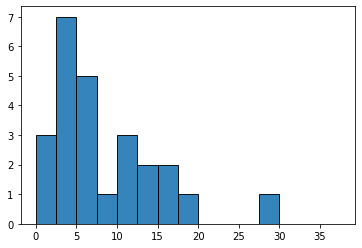

In [4]:
bins = np.arange(0, 40, 2.5)
evaluation.plot_hist([0], 'abs_mean_error', bins)


Plot LSTM Histogram

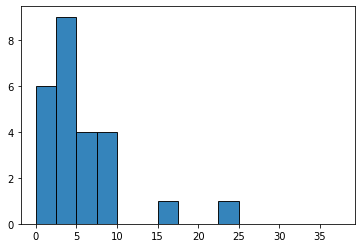

In [5]:
evaluation.plot_hist([1], 'abs_mean_error', bins)

Plot LSTM++ Histogram

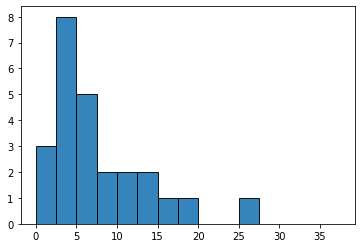

In [6]:
evaluation.plot_hist([2], 'abs_mean_error', bins)

Plot CNN Histogram

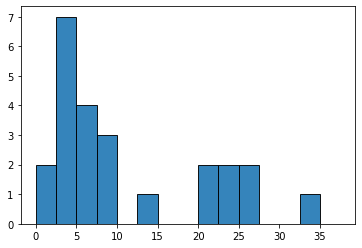

In [7]:
evaluation.plot_hist([3], 'abs_mean_error', bins)